# Coffee Sales Analysis

Exploratory Data Analysis of a dataset that contains detailed records of coffee sales from a vending machine.

In [2]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## 1. Pull Raw Data, get some general info on it and check for missing or duplicated values

In [3]:
df = pd.read_csv('coffee_sales.csv')

In [12]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [10]:
df.describe()

,money
count,896.000000
mean,34.143906
std,4.573951
min,23.020000
25%,28.900000
50%,34.500000
75%,37.720000
max,40.000000


In [11]:
df.isna().value_counts()

date   datetime  cash_type  card   money  coffee_name
False  False     False      False  False  False          807
                            True   False  False           89
Name: count, dtype: int64

In [17]:
df.query('cash_type == "cash"')

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


Nan's in card column if pay method was cash - no need to do anything about it

In [15]:
df.duplicated().value_counts()

False    896
Name: count, dtype: int64

No duplicates

## 2. General analysis of popularity of different drink types 

Text(0.5, 1.0, 'Coffee type distribution')

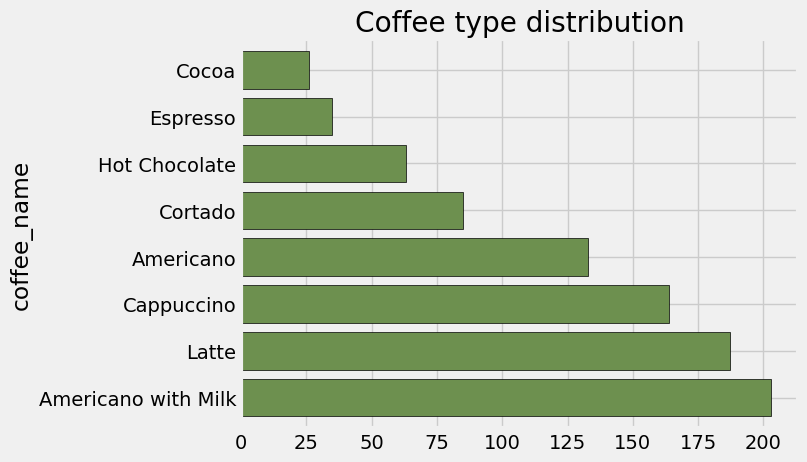

In [29]:
ax = df['coffee_name'].value_counts().plot(kind='barh',width=0.8,edgecolor='black',color=color_pal[3])
ax.set_title('Coffee type distribution')

## 3. Analysis of purchasing tendencies with time of day dependency

In [38]:
df['hour_time'] = pd.to_datetime(df['datetime'])

In [40]:
df['hour_time'] = df['hour_time'].dt.hour

In [41]:
df

,date,datetime,cash_type,card,money,coffee_name,hour_time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13
...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,21
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,10
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,13
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,16


In [43]:
def hour_to_tod(hour):
    if 12>hour>=6:
        return 'morning'
    elif 18>hour>=12:
        return 'afternoon'
    elif 23>=hour>=18:
        return 'evening'
    else:
        return 'night'
df['time_of_day'] = [hour_to_tod(hour) for hour in df['hour_time']]

In [44]:
df

,date,datetime,cash_type,card,money,coffee_name,hour_time,time_of_day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,afternoon
...,...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,21,evening
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,10,morning
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,13,afternoon
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,16,afternoon


In [45]:
df['time_of_day'].value_counts()

time_of_day
afternoon    392
evening      259
morning      245
Name: count, dtype: int64

So the venging machine works from 7 till 23 and there are no purchases at night

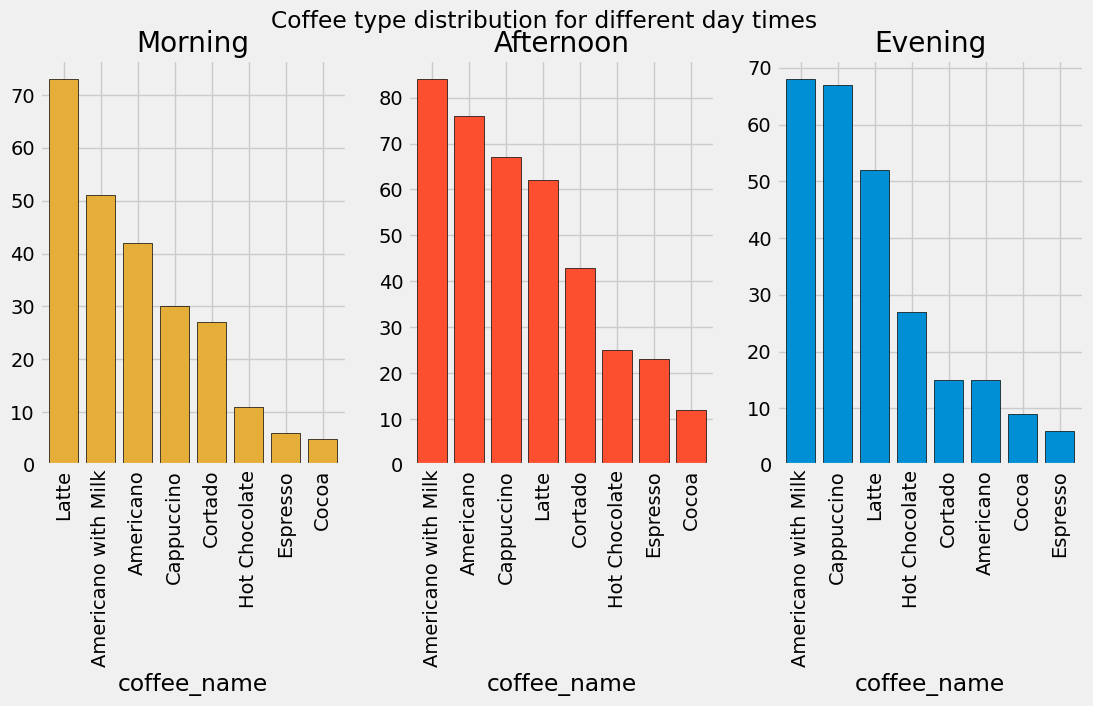

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,5))
fig.suptitle('Coffee type distribution for different day times')
df.query('time_of_day=="morning"')['coffee_name'].value_counts().plot(ax=ax1, kind='bar',width=0.8,edgecolor='black',color=color_pal[2])
df.query('time_of_day=="afternoon"')['coffee_name'].value_counts().plot(ax=ax2, kind='bar',width=0.8,edgecolor='black',color=color_pal[1])
df.query('time_of_day=="evening"')['coffee_name'].value_counts().plot(ax=ax3,kind='bar',width=0.8,edgecolor='black',color=color_pal[0])
ax1.set_title('Morning')
ax2.set_title('Afternoon')
ax3.set_title('Evening')

plt.show()

In [73]:
df['card'].nunique()

337

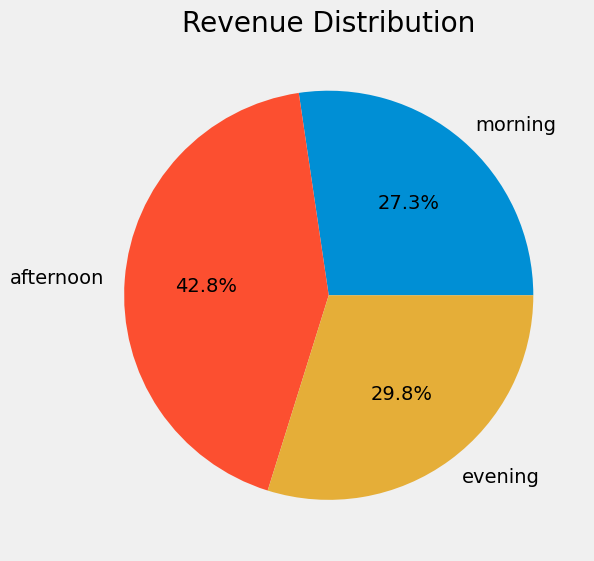

In [90]:
X = [df.query('time_of_day=="morning"')['money'].sum(), df.query('time_of_day=="afternoon"')['money'].sum(), df.query('time_of_day=="evening"')['money'].sum()]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(X, labels=['morning', 'afternoon', 'evening'], autopct='%.1f%%')
ax.set_title('Revenue Distribution')
plt.tight_layout()

In [138]:
df['date'] = pd.to_datetime(df['date'])

In [139]:
 df1 =df[['date','coffee_name']].groupby(['date','coffee_name']).size().to_frame(name = 'count').reset_index()

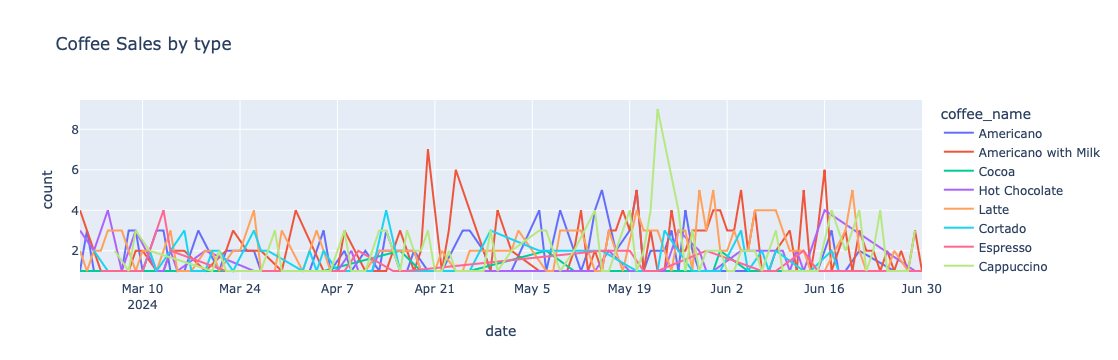

In [154]:
px.line(df1,x='date',y='count',color="coffee_name",title='Coffee Sales by type')

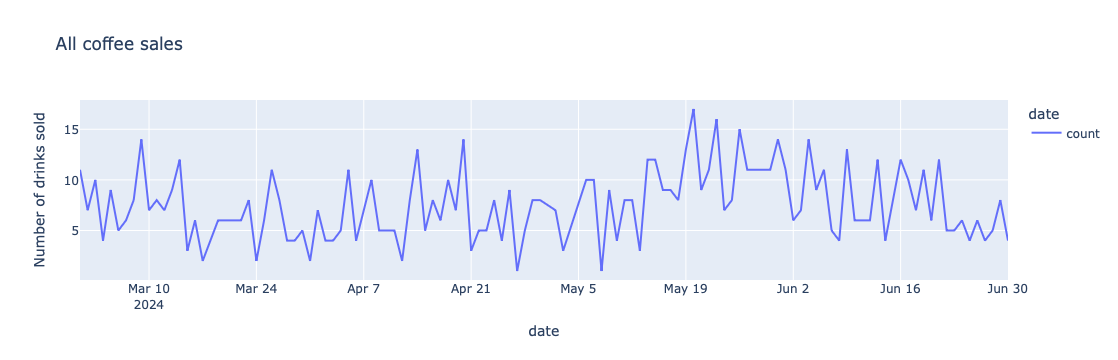

In [162]:
px.line(df1.groupby('date')['count'].sum(),title='All coffee sales',labels={"value": "Number of drinks sold", "variable": "date"})